In [1]:
# Remember to update your path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:\\Users\\Maxcell-HomePC\\QishiQR')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_split import MajorContracts

import json
import warnings
warnings.filterwarnings(action='ignore')

# ====== Initial Configuration ========

try:
    with open('../config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']
Major_DIR = config['Major path']
model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

# Zn test

## Build time series of Major contracts without thresholding the price movements, generate all ptb

In [2]:
zn_mj = MajorContracts(symbol='zn', split_time='2017-7-1', topdir='C:\\Users\\Maxcell-HomePC\\QishiQR\\Data', 
                       maturity={'1603':['2016-1-1','2016-2-29'],
                                 '1604':['2016-2-1','2016-3-31'],
                                 '1605':['2016-3-1','2016-4-30'],
                                 '1606':['2016-4-1','2016-5-31'],
                                 '1607':['2016-5-1','2016-6-30'],
                                 '1608':['2016-6-1','2016-7-31'],
                                 '1609':['2016-7-1','2016-8-31'],
                                 '1610':['2016-8-1','2016-9-30'],
                                 '1611':['2016-9-1','2016-10-31'],
                                 '1612':['2016-10-1','2016-11-30'],
                                 '1701':['2016-11-1','2016-12-31'],
                                 '1702':['2016-12-1','2017-1-31']
                                },
                       transitions = {'1603':'2016-2-1', 
                                      '1604':'2016-3-1', 
                                      '1605':'2016-4-1',
                                      '1606':'2016-5-1',
                                      '1607':'2016-6-1',
                                      '1608':'2016-7-1',
                                      '1609':'2016-8-1',
                                      '1610':'2016-9-1',
                                      '1611':'2016-10-1',
                                      '1612':'2016-11-1',
                                      '1701':'2016-12-1',
                                      '1702':'2017-1-1'
                                     },
                       freq=freq, offset=offset)

df_zn_train, df_zn_test, ptb = zn_mj.create_major_overlap()

strategy = list(ptb.values())
slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)

zn1603 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
zn1604 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
zn1605 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00:00:00
probability table:  20160229.0 20160331.0
zn1606 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1606 ['2016-4-1', '2016-5-31'] 2016-04-01 00:00:00 2016-05-01 00:00:00
probability table:  20160331.0 20160429.0
zn1607 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1607 ['2016-5-1', '2016-6-30'] 2016-05-01 00:00:00 2016-06-01 00:00:

# Compare the performance with static and continous updated ptb


# 1. test on major contract, use ptb generated based on last month's data

In [5]:
from Backtesting.Vectorized.models import OneContractTest

start_arr = ['20160701', '20160801', '20160901', '20161001', '20161101', '20161201']
end_arr =   ['20160801', '20160901', '20161001', '20161101', '20161201', '20170101']
ptb_arr = ['1608', '1609', '1610', '1611', '1612', '1701']
max_order=7
tcas = ['None']*max_order
test_perf = []
test_rlt = []
for i in range(0, 6):
    i
    ptb_tmp = ptb[ptb_arr[i]]
    start = start_arr[i]
    end = end_arr[i]
    ptb_tmp['signal'] = ptb_tmp.loc[:, '0':'2'].idxmax(axis=1)
    test_tmp = MajorSeriesTest(df_zn_train, OUTPUT_DIR,ptb_tmp)
    test_tmp.build( max_order, offset, start, end, tcas)
    test_tmp.run()      
    test_perf.append(test_tmp.performance)
    test_rlt.append(test_tmp.results)


#test1.run()

#test1.plot()
#test1.results[0]['benchmark'].plot()
#plt.legend()
#test1.performance

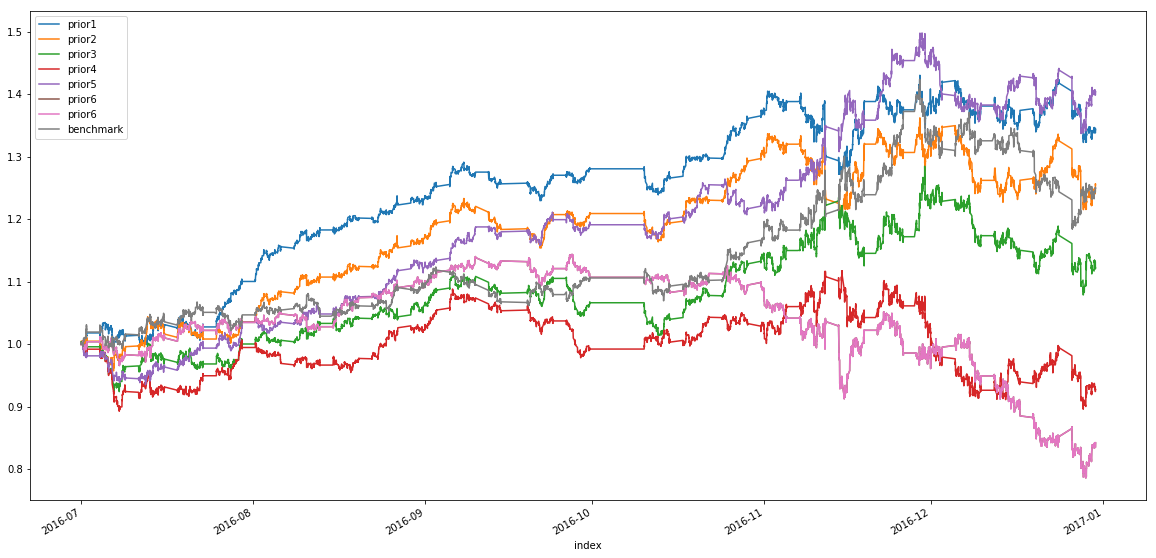

In [24]:
fig = plt.figure(figsize=(20,10))

result_equity_1 = [test_rlt[0][0]['equitycurve'],
                   test_rlt[1][0]['equitycurve']+(test_rlt[0][0]['equitycurve'][-1]-1), 
                   test_rlt[2][0]['equitycurve']+(test_rlt[1][0]['equitycurve'][-1]-1)+(test_rlt[0][0]['equitycurve'][-1]-1),
                   test_rlt[3][0]['equitycurve']+(test_rlt[2][0]['equitycurve'][-1]-1)+(test_rlt[1][0]['equitycurve'][-1]-1)+(test_rlt[0][0]['equitycurve'][-1]-1),
                   test_rlt[4][0]['equitycurve']+(test_rlt[3][0]['equitycurve'][-1]-1)+(test_rlt[2][0]['equitycurve'][-1]-1)+(test_rlt[1][0]['equitycurve'][-1]-1)+(test_rlt[0][0]['equitycurve'][-1]-1),
                   test_rlt[5][0]['equitycurve']+(test_rlt[4][0]['equitycurve'][-1]-1)+(test_rlt[3][0]['equitycurve'][-1]-1)+(test_rlt[2][0]['equitycurve'][-1]-1)+(test_rlt[1][0]['equitycurve'][-1]-1)+(test_rlt[0][0]['equitycurve'][-1]-1)
                  ]
    
result_equity_1 = pd.concat(result_equity_1)

result_equity_1.plot(label='prior1')

result_equity_2 = [test_rlt[0][1]['equitycurve'],
                   test_rlt[1][1]['equitycurve']+(test_rlt[0][1]['equitycurve'][-1]-1), 
                   test_rlt[2][1]['equitycurve']+(test_rlt[1][1]['equitycurve'][-1]-1)+(test_rlt[0][1]['equitycurve'][-1]-1),
                   test_rlt[3][1]['equitycurve']+(test_rlt[2][1]['equitycurve'][-1]-1)+(test_rlt[1][1]['equitycurve'][-1]-1)+(test_rlt[0][1]['equitycurve'][-1]-1),
                   test_rlt[4][1]['equitycurve']+(test_rlt[3][1]['equitycurve'][-1]-1)+(test_rlt[2][1]['equitycurve'][-1]-1)+(test_rlt[1][1]['equitycurve'][-1]-1)+(test_rlt[0][1]['equitycurve'][-1]-1),
                   test_rlt[5][1]['equitycurve']+(test_rlt[4][1]['equitycurve'][-1]-1)+(test_rlt[3][1]['equitycurve'][-1]-1)+(test_rlt[2][1]['equitycurve'][-1]-1)+(test_rlt[1][1]['equitycurve'][-1]-1)+(test_rlt[0][1]['equitycurve'][-1]-1)
                  ]
    
result_equity_2 = pd.concat(result_equity_2)
result_equity_2.plot(label='prior2')

result_equity_3 = [test_rlt[0][2]['equitycurve'],
                   test_rlt[1][2]['equitycurve']+(test_rlt[0][2]['equitycurve'][-1]-1), 
                   test_rlt[2][2]['equitycurve']+(test_rlt[1][2]['equitycurve'][-1]-1)+(test_rlt[0][2]['equitycurve'][-1]-1),
                   test_rlt[3][2]['equitycurve']+(test_rlt[2][2]['equitycurve'][-1]-1)+(test_rlt[1][2]['equitycurve'][-1]-1)+(test_rlt[0][2]['equitycurve'][-1]-1),
                   test_rlt[4][2]['equitycurve']+(test_rlt[3][2]['equitycurve'][-1]-1)+(test_rlt[2][2]['equitycurve'][-1]-1)+(test_rlt[1][2]['equitycurve'][-1]-1)+(test_rlt[0][2]['equitycurve'][-1]-1),
                   test_rlt[5][2]['equitycurve']+(test_rlt[4][2]['equitycurve'][-1]-1)+(test_rlt[3][2]['equitycurve'][-1]-1)+(test_rlt[2][2]['equitycurve'][-1]-1)+(test_rlt[1][2]['equitycurve'][-1]-1)+(test_rlt[0][2]['equitycurve'][-1]-1)
                  ]
    
result_equity_3 = pd.concat(result_equity_3)
result_equity_3.plot(label='prior3')

result_equity_4 = [test_rlt[0][3]['equitycurve'],
                   test_rlt[1][3]['equitycurve']+(test_rlt[0][3]['equitycurve'][-1]-1), 
                   test_rlt[2][3]['equitycurve']+(test_rlt[1][3]['equitycurve'][-1]-1)+(test_rlt[0][3]['equitycurve'][-1]-1),
                   test_rlt[3][3]['equitycurve']+(test_rlt[2][3]['equitycurve'][-1]-1)+(test_rlt[1][3]['equitycurve'][-1]-1)+(test_rlt[0][3]['equitycurve'][-1]-1),
                   test_rlt[4][3]['equitycurve']+(test_rlt[3][3]['equitycurve'][-1]-1)+(test_rlt[2][3]['equitycurve'][-1]-1)+(test_rlt[1][3]['equitycurve'][-1]-1)+(test_rlt[0][3]['equitycurve'][-1]-1),
                   test_rlt[5][3]['equitycurve']+(test_rlt[4][3]['equitycurve'][-1]-1)+(test_rlt[3][3]['equitycurve'][-1]-1)+(test_rlt[2][3]['equitycurve'][-1]-1)+(test_rlt[1][3]['equitycurve'][-1]-1)+(test_rlt[0][3]['equitycurve'][-1]-1)
                  ]
    
result_equity_4 = pd.concat(result_equity_4)
result_equity_4.plot(label='prior4')

result_equity_5 = [test_rlt[0][4]['equitycurve'],
                   test_rlt[1][4]['equitycurve']+(test_rlt[0][4]['equitycurve'][-1]-1), 
                   test_rlt[2][4]['equitycurve']+(test_rlt[1][4]['equitycurve'][-1]-1)+(test_rlt[0][4]['equitycurve'][-1]-1),
                   test_rlt[3][4]['equitycurve']+(test_rlt[2][4]['equitycurve'][-1]-1)+(test_rlt[1][4]['equitycurve'][-1]-1)+(test_rlt[0][4]['equitycurve'][-1]-1),
                   test_rlt[4][4]['equitycurve']+(test_rlt[3][4]['equitycurve'][-1]-1)+(test_rlt[2][4]['equitycurve'][-1]-1)+(test_rlt[1][4]['equitycurve'][-1]-1)+(test_rlt[0][4]['equitycurve'][-1]-1),
                   test_rlt[5][4]['equitycurve']+(test_rlt[4][4]['equitycurve'][-1]-1)+(test_rlt[3][4]['equitycurve'][-1]-1)+(test_rlt[2][4]['equitycurve'][-1]-1)+(test_rlt[1][4]['equitycurve'][-1]-1)+(test_rlt[0][4]['equitycurve'][-1]-1)
                  ]
    
result_equity_5 = pd.concat(result_equity_5)
result_equity_5.plot(label='prior5')

result_equity_6 = [test_rlt[0][5]['equitycurve'],
                   test_rlt[1][5]['equitycurve']+(test_rlt[0][5]['equitycurve'][-1]-1), 
                   test_rlt[2][5]['equitycurve']+(test_rlt[1][5]['equitycurve'][-1]-1)+(test_rlt[0][5]['equitycurve'][-1]-1),
                   test_rlt[3][5]['equitycurve']+(test_rlt[2][5]['equitycurve'][-1]-1)+(test_rlt[1][5]['equitycurve'][-1]-1)+(test_rlt[0][5]['equitycurve'][-1]-1),
                   test_rlt[4][5]['equitycurve']+(test_rlt[3][5]['equitycurve'][-1]-1)+(test_rlt[2][5]['equitycurve'][-1]-1)+(test_rlt[1][5]['equitycurve'][-1]-1)+(test_rlt[0][5]['equitycurve'][-1]-1),
                   test_rlt[5][5]['equitycurve']+(test_rlt[4][5]['equitycurve'][-1]-1)+(test_rlt[3][5]['equitycurve'][-1]-1)+(test_rlt[2][5]['equitycurve'][-1]-1)+(test_rlt[1][5]['equitycurve'][-1]-1)+(test_rlt[0][5]['equitycurve'][-1]-1)
                  ]
    
result_equity_6 = pd.concat(result_equity_6)
result_equity_6.plot(label='prior6')

result_equity_7 = [test_rlt[0][6]['equitycurve'],
                   test_rlt[1][6]['equitycurve']+(test_rlt[0][6]['equitycurve'][-1]-1), 
                   test_rlt[2][6]['equitycurve']+(test_rlt[1][6]['equitycurve'][-1]-1)+(test_rlt[0][6]['equitycurve'][-1]-1),
                   test_rlt[3][6]['equitycurve']+(test_rlt[2][6]['equitycurve'][-1]-1)+(test_rlt[1][6]['equitycurve'][-1]-1)+(test_rlt[0][6]['equitycurve'][-1]-1),
                   test_rlt[4][6]['equitycurve']+(test_rlt[3][6]['equitycurve'][-1]-1)+(test_rlt[2][6]['equitycurve'][-1]-1)+(test_rlt[1][6]['equitycurve'][-1]-1)+(test_rlt[0][6]['equitycurve'][-1]-1),
                   test_rlt[5][6]['equitycurve']+(test_rlt[4][6]['equitycurve'][-1]-1)+(test_rlt[3][6]['equitycurve'][-1]-1)+(test_rlt[2][6]['equitycurve'][-1]-1)+(test_rlt[1][6]['equitycurve'][-1]-1)+(test_rlt[0][6]['equitycurve'][-1]-1)
                  ]
    
result_equity_7 = pd.concat(result_equity_7)
result_equity_6.plot(label='prior6')

result_benchmark = [test_rlt[0][6]['benchmark'],
                   test_rlt[1][6]['benchmark']+(test_rlt[0][6]['benchmark'][-1]-1), 
                   test_rlt[2][6]['benchmark']+(test_rlt[1][6]['benchmark'][-1]-1)+(test_rlt[0][6]['benchmark'][-1]-1),
                   test_rlt[3][6]['benchmark']+(test_rlt[2][6]['benchmark'][-1]-1)+(test_rlt[1][6]['benchmark'][-1]-1)+(test_rlt[0][6]['benchmark'][-1]-1),
                   test_rlt[4][6]['benchmark']+(test_rlt[3][6]['benchmark'][-1]-1)+(test_rlt[2][6]['benchmark'][-1]-1)+(test_rlt[1][6]['benchmark'][-1]-1)+(test_rlt[0][6]['benchmark'][-1]-1),
                   test_rlt[5][6]['benchmark']+(test_rlt[4][6]['benchmark'][-1]-1)+(test_rlt[3][6]['benchmark'][-1]-1)+(test_rlt[2][6]['benchmark'][-1]-1)+(test_rlt[1][6]['benchmark'][-1]-1)+(test_rlt[0][6]['benchmark'][-1]-1)
                  ]
    
result_benchmark = pd.concat(result_benchmark)
result_benchmark.plot(label='benchmark')
plt.legend()                   
plt.show()

fig.savefig('dynamic_ptb.png', dpi=fig.dpi)


## Cluster structure in equity curve? 

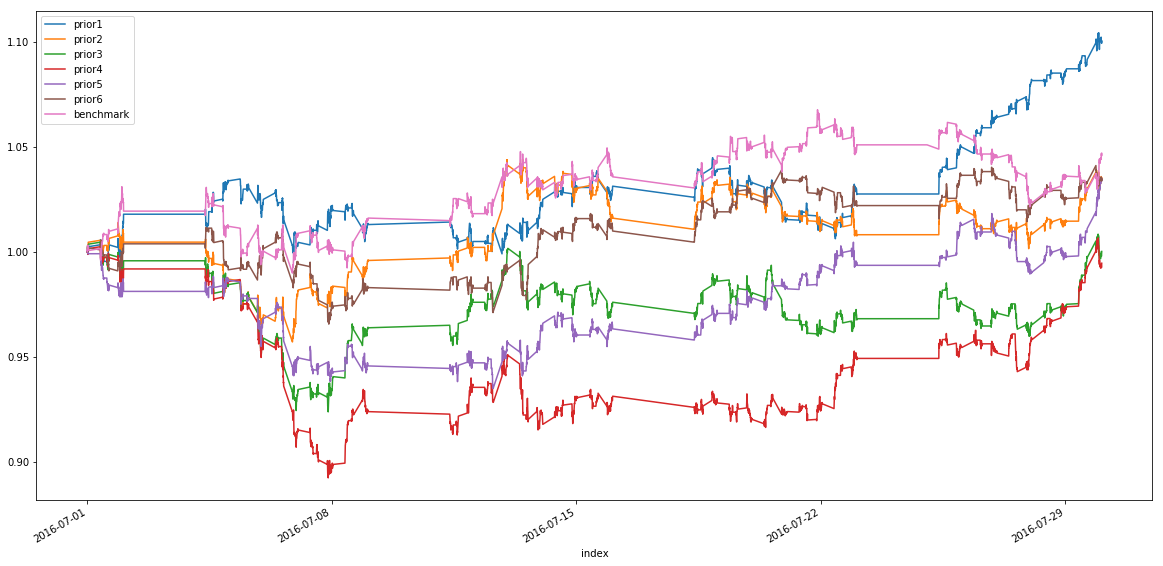

In [7]:
plt.figure(figsize=(20,10))
for i in range(0, 6):
    test_rlt[0][i]['equitycurve'].plot(label='prior'+str(i+1))
    
test_rlt[0][0]['benchmark'].plot(label='benchmark')
plt.legend()
plt.show()

## 2. test on major contract, use ptb generated based on data between Jan. and June

In [35]:
zn_mj = MajorContracts(symbol='zn', split_time='2016-7-1', topdir='C:\\Users\\Maxcell-HomePC\\QishiQR\\Data', 
                       maturity={'1603':['2016-1-1','2016-2-29'],
                                 '1604':['2016-2-1','2016-3-31'],
                                 '1605':['2016-3-1','2016-4-30'],
                                 '1606':['2016-4-1','2016-5-31'],
                                 '1607':['2016-5-1','2016-6-30'],
                                 '1608':['2016-6-1','2016-7-31'],
                                 '1609':['2016-7-1','2016-8-31'],
                                 '1610':['2016-8-1','2016-9-30'],
                                 '1611':['2016-9-1','2016-10-31'],
                                 '1612':['2016-10-1','2016-11-30'],
                                 '1701':['2016-11-1','2016-12-31'],
                                 '1702':['2016-12-1','2017-1-31']
                                },
                       transitions = {'1603':'2016-2-1', 
                                      '1604':'2016-3-1', 
                                      '1605':'2016-4-1',
                                      '1606':'2016-5-1',
                                      '1607':'2016-6-1',
                                      '1608':'2016-7-1',
                                      '1609':'2016-8-1',
                                      '1610':'2016-9-1',
                                      '1611':'2016-10-1',
                                      '1612':'2016-11-1',
                                      '1701':'2016-12-1',
                                      '1702':'2017-1-1'
                                     },
                       freq=freq, offset=offset)

df_zn_train, df_zn_test, ptb = zn_mj.create_major_overlap()

strategy = list(ptb.values())
slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)

zn1603 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
zn1604 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
zn1605 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00:00:00
probability table:  20160229.0 20160331.0
zn1606 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1606 ['2016-4-1', '2016-5-31'] 2016-04-01 00:00:00 2016-05-01 00:00:00
probability table:  20160331.0 20160429.0
zn1607 C:\Users\Maxcell-HomePC\QishiQR\Data/zn
0
ID trade_range transition_begin transition_end
1607 ['2016-5-1', '2016-6-30'] 2016-05-01 00:00:00 2016-06-01 00:00:

In [36]:
fig = plt.figure(figsize=(20,10))
start = '20160701'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test_all = MajorSeriesTest(df_zn_test, OUTPUT_DIR,slm)
test_all.build( max_order, offset, start, end, tcas)

test_all.run()

test_all.plot()
test_all.results[0]['benchmark'].plot()
plt.legend()
test_all.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.243949,0.002279,-0.002106,0.001184,0.000045,-0.054822,0.019105,-0.104163,0.562479,2.335725,7445,1.335041,0.472129
1,0.247523,0.002396,-0.002237,0.001169,0.000060,-0.054822,0.019105,-0.102608,0.522528,2.419558,5875,1.352151,0.634043
2,0.240026,0.002489,-0.002255,0.001209,0.000067,-0.055774,0.019105,-0.105399,0.536256,2.592521,5450,1.365896,0.651560
3,0.243998,0.001488,-0.002154,0.001263,0.000040,-0.054822,0.025530,-0.136839,0.586124,1.524354,5515,1.218700,0.623209
4,0.239423,0.000555,-0.002100,0.001277,0.000014,-0.054822,0.019105,-0.154413,0.607953,0.579818,5907,1.081627,0.576096
5,0.271643,0.000261,-0.001933,0.001391,0.000006,-0.050765,0.020268,-0.205205,0.719640,0.239986,6254,1.038332,0.502558
6,0.247814,-0.000721,-0.001860,0.001492,-0.000016,-0.035736,0.023063,-0.185545,0.802103,-0.727805,6601,0.893948,0.430995


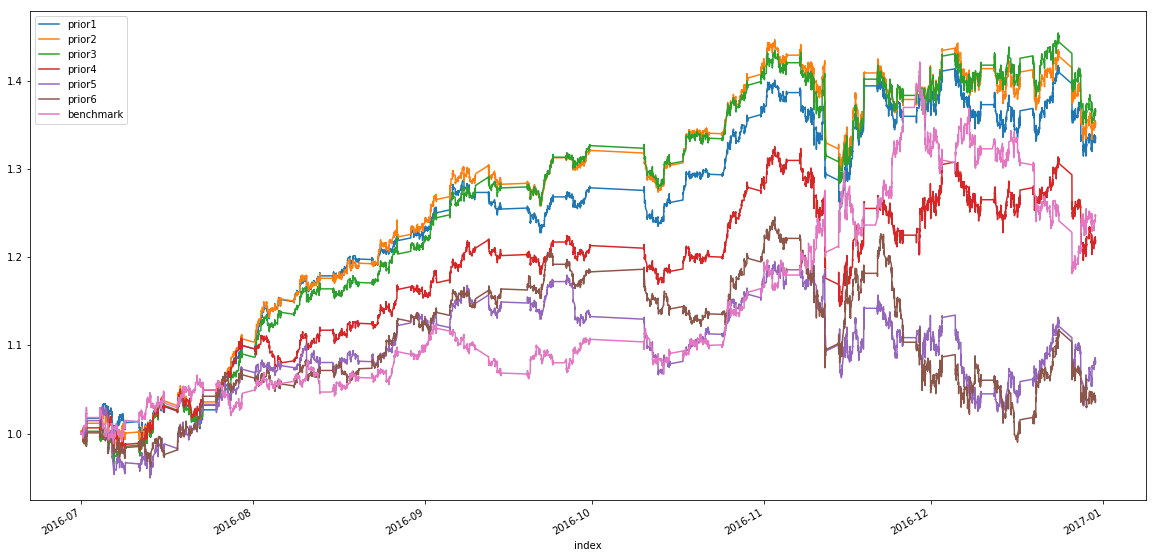

In [38]:
fig = plt.figure(figsize=(20,10))
for i in range(0, 6):
    test_all.results[i]['equitycurve'].plot(label='prior'+str(i+1))
    
test_all.results[0]['benchmark'].plot(label='benchmark')
plt.legend()
plt.show()
fig.savefig('static_ptb.png', dpi=fig.dpi)

# Compare the performance

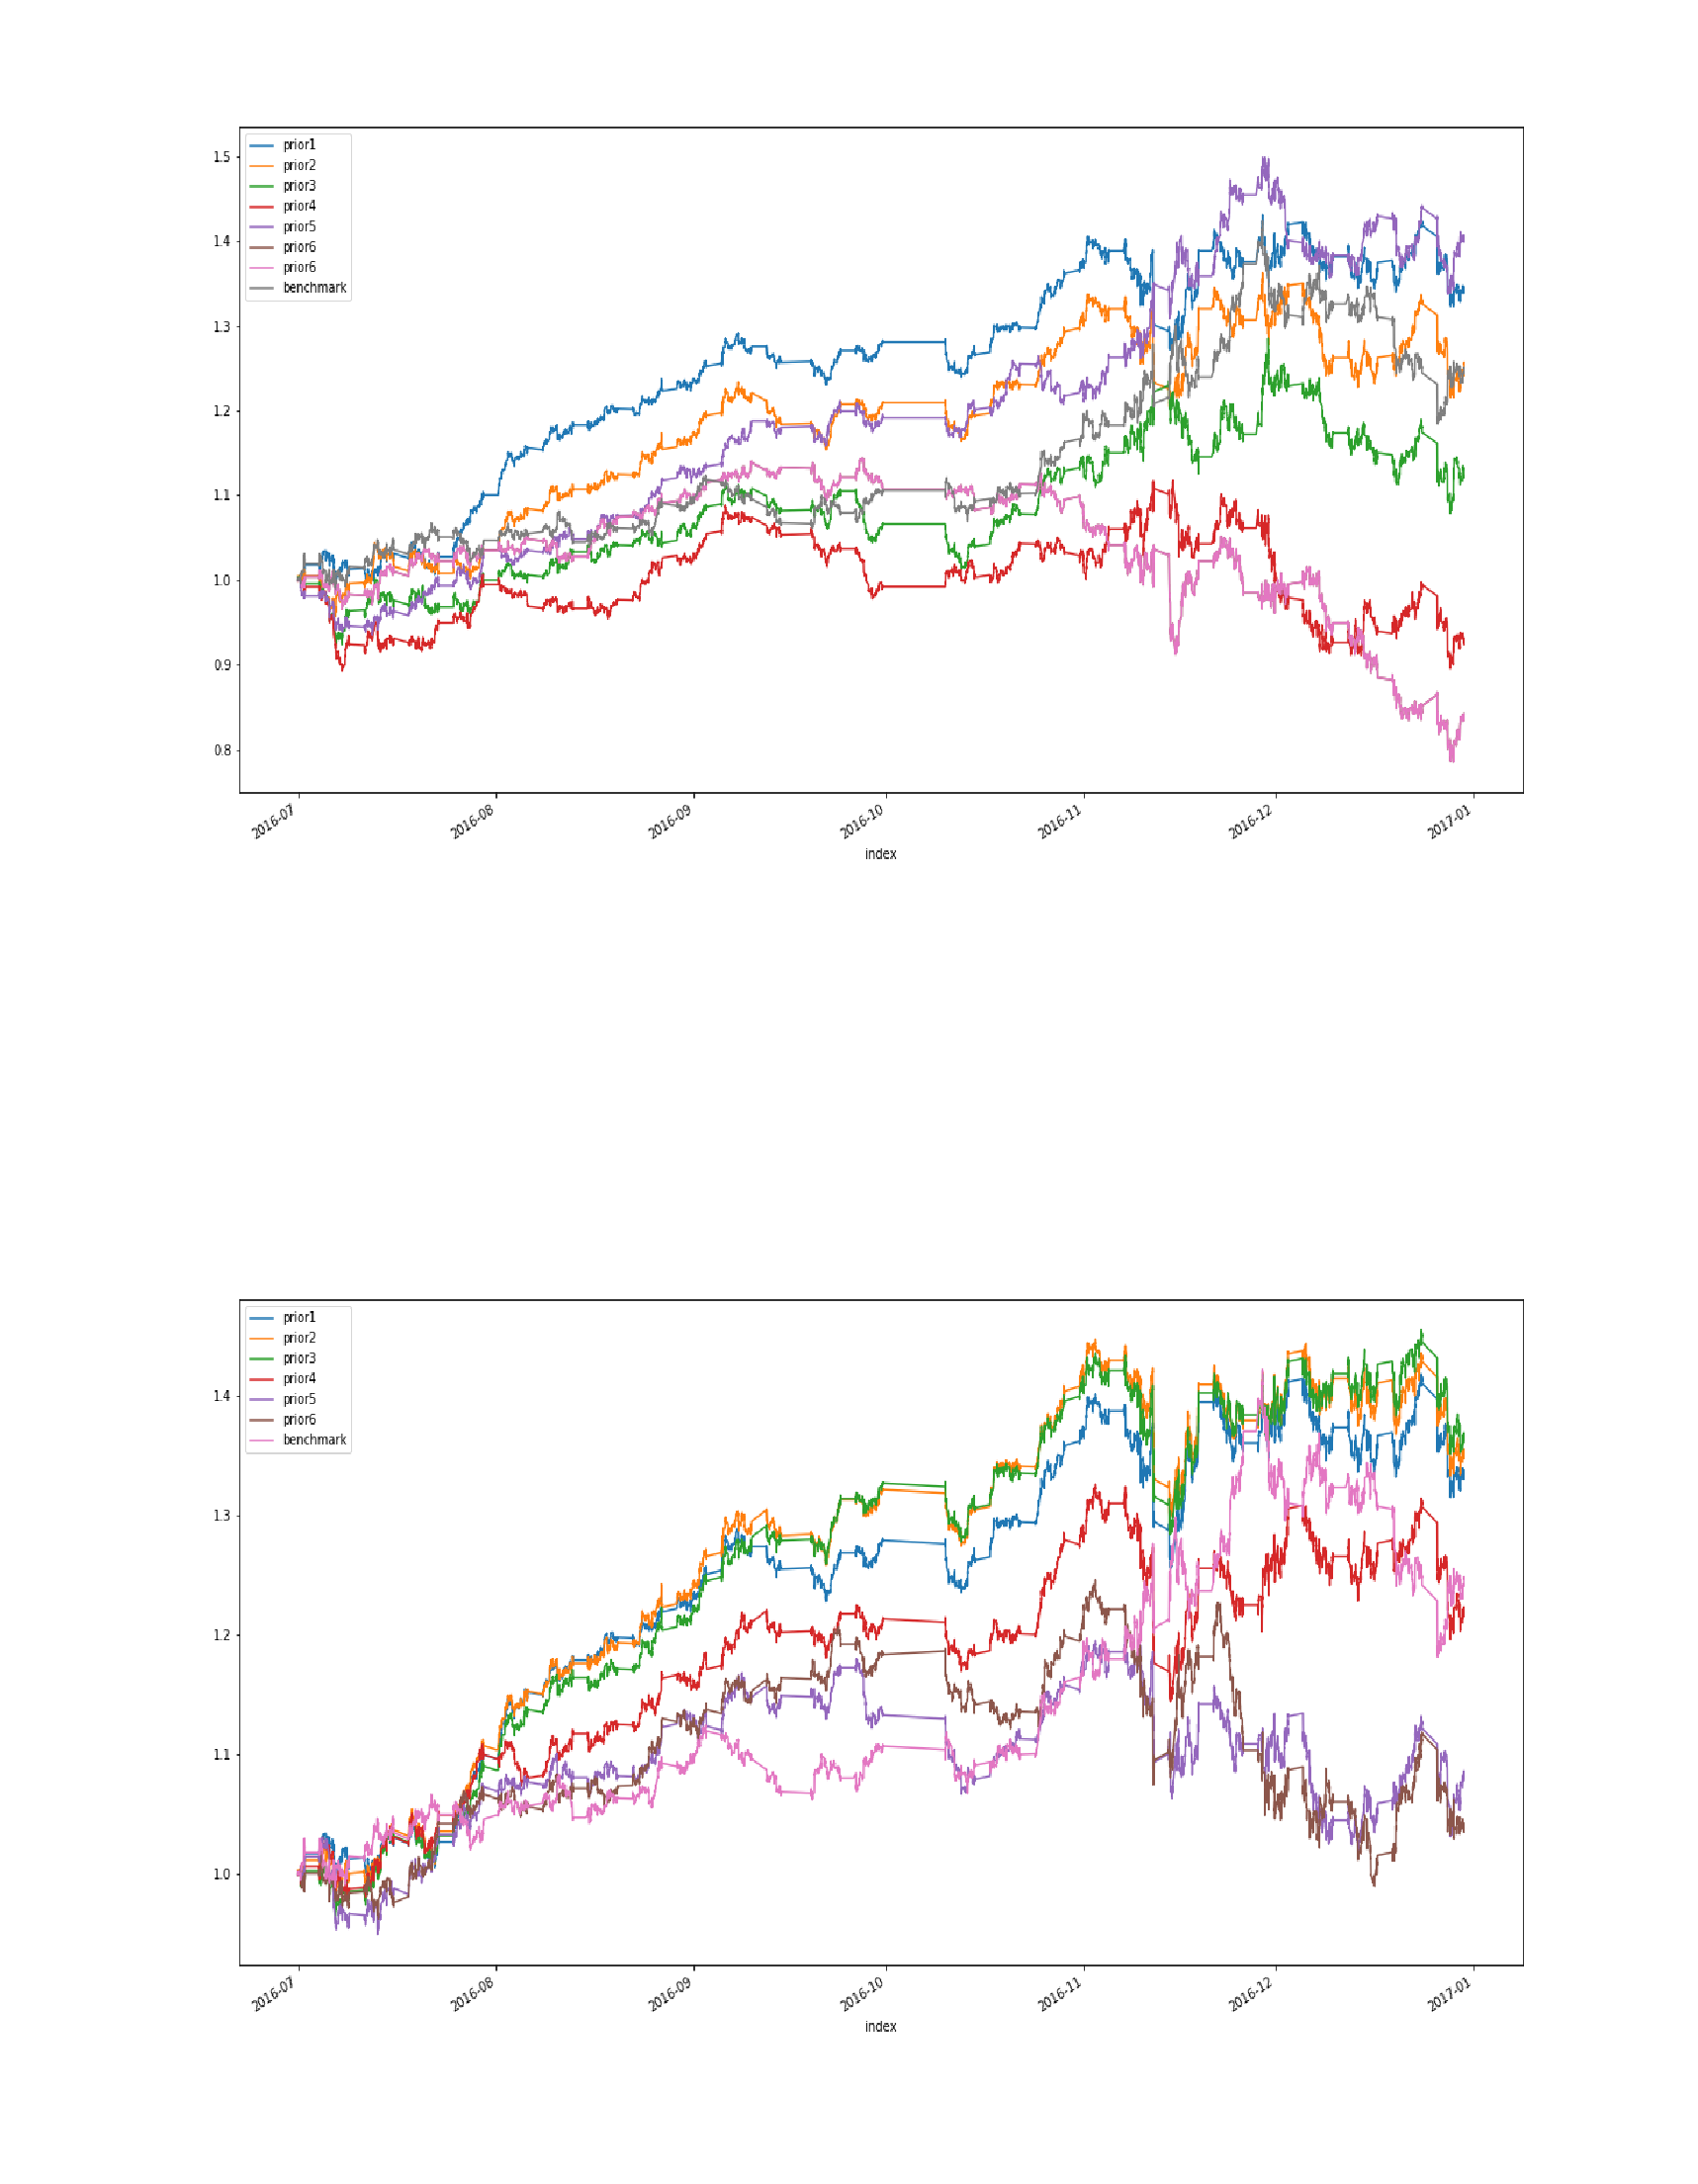

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1=mpimg.imread('./dynamic_ptb.png')
img2=mpimg.imread('./static_ptb.png')

f, axarr = plt.subplots(2, 1, figsize=(30, 40))

axarr[0].imshow(img1, aspect="auto")
#axarr[0].set_title("Dynamic ptb")
axarr[0].axis('off')

axarr[1].imshow(img2, aspect="auto")
#axarr[1].set_title("Static ptb")
axarr[1].axis('off')


plt.show()
